취업난 사실 조사(데이터 분석 프로젝트)
=====================





----------------------------------------------

# 1. 주제 선정 이유

21세기에 접어들면서 매년 빠짐없이 화두에 오르는 취업난 문제. 많은 사람들이 뉴스와 시사 프로그램 등 미디어 매체에서 한국의 취업률이 매년 낮아지고 있다는 보도를 자주 접하고 있다. 이로 인하여 대학생들 및 많은 예비 구직자들은 취업을 겪어 보기도 전에 스스로를 과소평가하며 자신감을 상실하고 있다. 이러한 사회적 분위기의 여파로 20대들 사이에서는 '헬조선'이라는 신조어까지 생겼는데, 이또한 취업하기 힘든 나라, 공부만 열심히 하고 그 노력에 대한 보상은 받기 힘든 나라로 인식하는것에서 비롯되었다고 볼 수 있다.
하지만, 미디어 기사의 타이틀만 극심한 취업난을 자극적으로 표현하며 와닿지 않는 퍼센트 수치만 내세울 뿐이다. 그러므로, 이와 관련된 믿을만한 데이터를 분석하여 직접 확인해볼 필요가 있을 것이다.

# 2. 가설 정의

급격하게 발전한 우리나라는 고작 20~30년 정도 차이나는 우리의 부모님 세대와만 비교해 보더라도 삶의 질이 드라마틱하게 증가했음을 알 수 있다. 취업을 힘들어하는 주변사람들을 보면서, 급격한 발전을 이루기전에 우리들의 부모님 세대들은 취업을 앞두고 어떤것들을 고려했을지 의문을 가졌다. 현재와 같이 대기업, 공기업만 바라보며 연봉에 대한 눈이 높거나, 서울 경기권을 고집하고 사무직만을 원하지는 않았을 것이다. 우리가 느끼고 있는 취업난은 우리들 스스로가 만든 것이라는 생각이 들었다. 
'취업이 힘들다는 것은 어디까지나 자신이 원하는 목표 기업에 들어가기 어려울 뿐, 실질적인 취업률은 예전과 큰 차이가 없을 것이다.'

취업 준비생들이 기업체를 지원할때 가장 많이 고려하는 것은 '연봉'으로 매년 부동의 1위를 지키고 있다고 한다.(취업 포털 사이트 인크루트 설문조사) 따라서, 연간 취업률과 희망 연봉 데이터를 분석해보고 왜 취업난 문제가 매년 회자되는지 추측해보자.
 


# 3. 인터넷을 통한 데이터 획득
   
  <excel파일>
- 연령별 경제활동 인구 (KOSIS - 통계청 kosis.kr)
- 연령별 비경제활동 인구 (KOSIS - 통계청 kosis.kr)
- 취업(시간별) 취업자 (KOSIS - 통계청 kosis.kr)
- 연도별 평균 연봉 (KOSIS - 통계청 kosis.kr)  
- 연도별 희망연봉 (잡코리아, 사람인, 인크루트)
- 소비자물가 상승률 (통계청, 「소비자물가조사)  
    
# 4. 분석을 위한 데이터의 가공

1. 기본적으로 모든 데이터들을 excel 파일들로 수집하였으므로, python의 openpyxl module의 load_workbook 메서드를 이용하여 데이터에 접근한다.

In [5]:
from openpyxl import load_workbook

2. excel의 데이터중 필요로 하는 정보를 추출하기 위해 각 excel 파일들의 테이블 구조를 참고하여 파일별 알고리즘을 구축한다.
- 취업률을 계산하는데 있어 대상자는 '모든 취업자'와 '20-39세' 두 부류로 추출한다.
- getTotalnumberof 사용자 정의 함수를 이용하여 '20-29세'그룹과 '30-39'세 그룹의 인구수와 노동자수를 얻어낸다.
- 취업률 공식에 대입하여 20~29세 그룹의 취업률(data1)과 30-39세 그룹의 취업률(data2)를 추출한다.
- 20-39세 대상의 취업률 : (20-29세 취업자 수 / 20-29세 인구수), (30-39세 취업자 수 / 30-39세 인구수)

In [7]:
import copy

###########################################################################################
# 연령별_경제활동인구_총괄_20190417134039.xlsx
# get date of hire rates in two groups, 20-29 age group and 30-39 age group

def getTotalnumberof(cellrange,ageToage):
    
    """
    (tuple, string) -> (list, list)
    
    get the number of population and workers in an age group by using cell_range of Exell file and inputted age group

    """

    totalnumberofAll = {} 
    totalnumberofWorkers = {}
    colforAgegroup = sheet['A']
    

    for age in colforAgegroup: # get the row number pointing an inputted agegroup
        if age.value == ageToage: 
            temprow = age.row
            break
    
    count = 0
    for year in cell_range[0]: # make dictionaries that have data the number of people and wokers in the group with the year 
        
        if year.column == 1:
            continue
        if type(year.value) is str:
            tempcol = year.column
            totalnumberofAll[year.value] = sheet[temprow][tempcol-1].value 
            tempyear = year
        
        if cell_range[1][count].value == '취업자 (천명)':
            totalnumberofWorkers[tempyear.value] = cell_range[temprow-1][count].value
        count += 1
    

# make the dictionary meaningful
    tempdict = copy.deepcopy(totalnumberofAll)
    for i in tempdict.keys(): 
        if i == '2019. 03':
            break
        del totalnumberofAll[i]
        del totalnumberofWorkers[i]
    totalnumberofAll = sorted(totalnumberofAll.items())
    totalnumberofWorkers = sorted(totalnumberofWorkers.items())
    return totalnumberofAll, totalnumberofWorkers


###########################################################################################    
        
    
mydata = load_workbook('data/연령별_경제활동인구_총괄_20190417134039.xlsx', data_only = True)
sheet = mydata['데이터']
cell_range = sheet['A1':'IW22']

totalnumber20to29 = [] # the total number of people in the 20-29 age group (the exact number of people is value * 1000)
totalnumber30to39 = [] 
thenumberofworkers20to29 = [] # the number of workers in the 20-29 age group (the exact number of people is value * 1000)
thenumberofworkers30to39 = []

totalnumber20to29, thenumberofworkers20to29 = getTotalnumberof(cell_range, '20 - 29세')
totalnumber30to39, thenumberofworkers30to39 = getTotalnumberof(cell_range, '30 - 39세')


# calculate the hire rate each group 

hirerate20to29 = [] # the hire rate of 20-29 age group - data 1
hirerate30to39 = [] # the hire rate of 30-39 age group - data 2


for i in range(len(totalnumber20to29)):
    year = totalnumber20to29[i][0]
    rate = "%0.2f" % float(thenumberofworkers20to29[i][1] / totalnumber20to29[i][1] * 100)
    hirerate20to29.append((year, rate))

for i in range(len(totalnumber30to39)):
    year = totalnumber30to39[i][0]
    rate = "%0.2f" % float(thenumberofworkers30to39[i][1] / totalnumber30to39[i][1] * 100)
    hirerate30to39.append((year, rate))

###########################################################################################  

- 연령별 경제활동 인구 파일과 취업(시간별) 취업자 파일로 부터 취업률을 계산한다. 
- 전체 인구 대비 고용률을 구하기 위해 20세 이상 인구수와 모든 노동자 수를 얻어낸다.
- 아래의 공식을 이용하여 대한민국 전체 인구에 대한 경제활동 비율(data3)를 추출한다.
- 모든 취업자를 대상으로 한 취업률 = (모든 취업자 수/20세 이상인 인구수)

In [8]:

###########################################################################################  
# 취업시간별_취업자_20190417133410.xlsx
# get data of the hire rate for all people regardless of their age

mydata2 = load_workbook('data/취업시간별_취업자_20190417133410.xlsx', data_only = True)
sheet2 = mydata2['데이터']

cell_range2 = sheet2['A1':'AT2']


totalnumberofpeople = {} # the total number of population
totalnumberofworkers = {} # the total number of all workers 

count = 0
for year in cell_range2[0]:  
    if year.column == 'A':
        continue
    totalnumberofworkers[year.value] = cell_range2[1][count].value
    count += 1

# make the dictionary meaningful : get the data (from 2000 to 2019)
tempdict = copy.deepcopy(totalnumberofworkers)
for i in tempdict.keys(): 
    if i == '2019. 03':
        break
    del totalnumberofworkers[i]
totalnumberofworkers = sorted(totalnumberofworkers.items())


for i in range(len(totalnumberofworkers)):
    if totalnumberofworkers[i][0] == '2000':
        count = i
        break

totalnumberofworkers = totalnumberofworkers[count:]



# to get the number of population, '연령별_경제활동인구_총괄_20190417134039.xlsx' is used again
###########################################################################################
colforFindingdata = sheet['A']
for val in colforFindingdata:
    if val.value == '계':
        temprow = val.row

count = 0
for year in cell_range[0]:  
    if year.column == 'A':
        continue
    if type(year.value) is str:
        tempcol = year.column
        tempyear = year
        
    if cell_range[1][count].value == '15세이상인구 (천명)':
        totalnumberofpeople[tempyear.value] = cell_range[temprow-1][count].value
    count += 1
# make the dictionary meaningful
tempdict = copy.deepcopy(totalnumberofpeople)
for i in tempdict.keys(): 
    if i == '2019. 03':
        break
    del totalnumberofpeople[i]
totalnumberofpeople = sorted(totalnumberofpeople.items())
###########################################################################################    


# calculate the hire rate for all people

hirerateall = [] # the hire rate for all - data 3

for i in range(len(totalnumberofpeople)):
    year = totalnumberofpeople[i][0]
    rate = "%0.2f" % float(totalnumberofworkers[i][1] / totalnumberofpeople[i][1] * 100)
    hirerateall.append((year, rate))


- 연도별 평균연봉과 희망연봉 데이터를 추출한다.
- getAveragesalaryof 사용자 정의 함수를 이용하여 대상이 되는 연령층별 평균 연봉(data4~6)을 얻어낸다.
- 평균 연봉은 (월임금총액 * 12)로 계산하며, 월임금총액은 (정액급여+초과급여+전년도연간특별급여/12개월)이다.
- 희망연봉 데이터(data7)를 따로 얻어낸다.
- 소비자 물가의 변화를 무시한 평균연봉과 희망연봉의 비교는 현실적인 의미가 없으므로 소비자물가(CPI) 상승률 데이터를 추출
- 신입사원에 대한 평균연봉 상승률(data8), 취업준비자들의 희망연봉 상승률(data9)을 기존의 데이터로 부터 얻어낸다.
- 상승률 = (올해 데이터/전년도 데이터 * 100)
- 세가지 상승률 데이터를 비교한다.

In [9]:
###########################################################################################
# 연령별_임금_및_근로시간_20190428172144.xlsx
# get the data of average salaries per year

def getAveragesalaryof(cell_range, ageToage):
    """
    (tuple, string) -> list
    
    get an average salary in a group of ageToage 

    """
    averageSalaries = {} # average salaries from 2006 to 2018

    colforFindingdata = sheet3['A']
    colforAgegroup = sheet3['B']
    
    for data in colforFindingdata: # get the row number pointing an inputted data
        if data.value == '전체근로자(특수형태포함)':
            temprow = data.row
            break
    for age in colforAgegroup: # get the row number pointing an inputted age group
        if age.value == ageToage and age.row >= temprow:
            temprow = age.row
            break
    for year in cell_range[0]: # make dictionary having data, the average salary with year
        if year.column == 1 or year.column == 2:
            continue
        if type(year.value) is str:
            tempcol = year.column
            averageSalaries[year.value] =  "%0.2f" % float(sheet3[temprow][tempcol-1].value * 1.2)
        
    averageSalaries = sorted(averageSalaries.items())
    return averageSalaries

###########################################################################################

mydata3 = load_workbook('data/연령별_임금_및_근로시간_20190428172144.xlsx', data_only = True)
sheet3 = mydata3['데이터']
cell_range3 = sheet3['A1':'O17']



averagesalary0to29 = getAveragesalaryof(cell_range3, '29세이하') # the average salary of 0-29 age group - data 4
averagesalary30to39 = getAveragesalaryof(cell_range3, '30~39세') # the average salary of 30-39 age group - data 5
averagesalaryall = getAveragesalaryof(cell_range3, '전체') # the average salary for all - data 6

###########################################################################################
# 희망연봉.xlsx
# get the data of Expected salary per year


mydata4 = load_workbook('data/희망연봉.xlsx', data_only = True)
sheet4 = mydata4['Sheet1']
cell_range4 = sheet4['A1':'N2']


expectedsalaries = {} # expected salaries from 2006 to 2019

for year in cell_range4[0]:
    if sheet4[2][year.column-1].value == 0:
        continue
    expectedsalaries[year.value] = sheet4[2][year.column-1].value

expectedsalaries = sorted(expectedsalaries.items()) # expected salaries of people looking for a job  - data 7

###########################################################################################
# calculate the growth rate of an average salary and an expected salary in 20-29 age group  

growthrateofAverage20to29 = {} # - data 8
growthrateofExpected = {} # - data 9

count = 0
for i in range(1, len(averagesalary0to29)):
    growthrateofAverage20to29[averagesalary0to29[i][0]] = "%0.2f" % float((float(averagesalary0to29[i][1]) / float(averagesalary0to29[i-1][1]) - 1) * 100)

for i in range(1, len(expectedsalaries)):
    growthrateofExpected[expectedsalaries[i][0]] = "%0.2f" % float((float(expectedsalaries[i][1]) / float(expectedsalaries[i-1][1]) - 1) * 100)

###########################################################################################
# stats_402701.xlsx   :   data file for CPI(consumer price index)
# get the growth rate of consumer price index

mydata5 = load_workbook('data/stats_402701.xlsx', data_only = True)
sheet5 = mydata5['Sheet1']
cell_range5 = sheet5['A1':'K12']


growthrateofCPI = {} # the growth rate of CPI

count = 1
for year in cell_range5[1]:  
    if year.column == 1:
        continue
    growthrateofCPI[year.value] = cell_range5[3][count].value
    count += 1

growthrateofCPI = sorted(growthrateofCPI.items()) # the growth rate of CPI - data 10


# 5. 분석 결과 도출


- Python을 이용한 데이터 분석 라이브러리 Pandas를 사용한다.
- Pandas에서 제공하는 DataFrame 자료형에 위에서 가공한 데이터( data1 ~ data10 )를 적절히 저장시킨다.
- 분석한 데이터를 효과적으로 보여주기 위해 matplotlib 모듈을 사용하여 그래프로 시각화한다.

1. 취업률(20~29세 그룹과 30~39세 그룹) = data1, data2가 이용됨

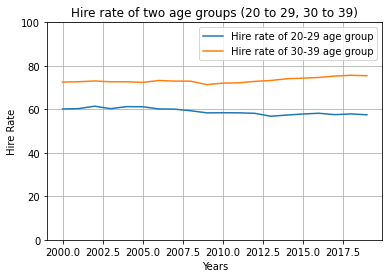

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# List form for DataFrame
years = []
Hirerate20and30 = []# =[[hirerate20to29 in xxxx(year), hirerate30to39 in xxxx(year)], [], [], ...]

for i in range(len(hirerate20to29)):
    Hirerate20and30.append([float(hirerate20to29[i][1]), float(hirerate30to39[i][1])])
    years.append(int(float(hirerate20to29[i][0].replace(" ", ""))))
    
#make DataFrame
df = pd.DataFrame(Hirerate20and30, columns = ['Hire rate of 20-29 age group', 'Hire rate of 30-39 age group'], index = years)

#show graphs
lines = df.plot.line()
plt.title("Hire rate of two age groups (20 to 29, 30 to 39)")
plt.xlabel("Years")
plt.ylabel("Hire Rate")
plt.ylim(0,100)
plt.grid()

plt.show()

2. 전체 인구별 경제활동 비율 = data3이 이용됨

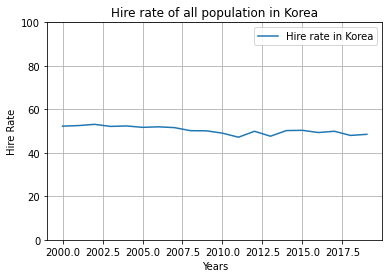

In [11]:

# List form for DataFrame
years = []
Hirerate = [] #Hire rate in Korea

for i in hirerateall:
    Hirerate.append(float(i[1]))
    years.append(float(i[0].replace(" ", "")))
    
#make DataFrame
df = pd.DataFrame(Hirerate, columns = ['Hire rate in Korea'], index = years)

#show graphs
lines = df.plot.line()

plt.title("Hire rate of all population in Korea")
plt.xlabel("Years")
plt.ylabel("Hire Rate")
plt.ylim(0,100)
plt.grid()

plt.show()

3. 세가지 데이터(연도별 CPI(소비자 물가지수), 초임 평균 연봉, 구직자 희망 연봉)에 대한 '연도별 상승률' = data8, data9, data10이 이용됨

- 그래프를 알맞게 해석하기 위해, 아래의 데이터는 '상승률'이라는 점에 주의하자. 
- cpi, 초임 연봉, 희망연봉의 실제 데이터 수치가 아닌, 상승률 수치를 사용한 이유 : 초임연봉, 희망연봉과 cpi는 단위가 다르기 때문에 한 곳에서 세가지 데이터를 동시에 비교하기 힘들다. 상승률을 비교한다면 단위와 상관없이 어느정도 비율로 상승 또는 하강했는지 비교 가능하다.

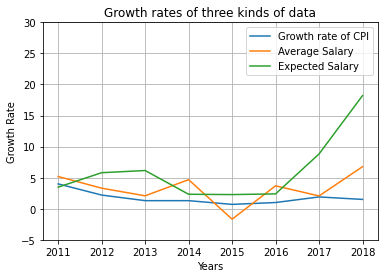

In [12]:
# List form for DataFrame
years = []
averagesalList = []
expectedsalList = []
cpiList =[]

#set lists to be the same length(the same range of years)
for key, val in growthrateofExpected.items():
    expectedsalList.append(float(val))
    years.append(key)
del expectedsalList[-1]
del years[-1]
count = 0
for key, val in growthrateofAverage20to29.items():
    
    if int(key) == years[count]:
        averagesalList.append(float(val))
        count += 1
count = 0
for i in growthrateofCPI:
    if i[0] == years[count]:
        cpiList.append(float(i[1]))
        count += 1

        
Listforthree=[] # the list will include tree different data(growth rate of cpi, average salary, and expected salary) 
for idx,i in enumerate(cpiList):
    Listforthree.append([cpiList[idx],averagesalList[idx],expectedsalList[idx]])

#make DataFrame
df = pd.DataFrame(Listforthree, columns = ['Growth rate of CPI', 'Average Salary', 'Expected Salary'], index = years)

#show graphs
lines = df.plot.line()

plt.title("Growth rates of three kinds of data")
plt.xlabel("Years")
plt.ylabel("Growth Rate")
plt.ylim(-5,30)
plt.grid()

plt.show()

# 6. 결론


- 20~29세 그룹의 취업률은 약60%로 유지되었다.
- 30~39세 그룹의 취업률은 약70%에서 유지되었고 결론적으로 약간 상승하였다.
- 전체 인구에 대한 취업률은 약50%로 유지되었다.

=> 연령별 실제 취업률과 경제활동 비율과 전체 인구에 대한 비율을 확인해본 결과, 2000년도 이후 현재까지 비율상 큰 변화가 없음을 확인하였다. 


- 신입사원들 기준 초봉은 2014~2015 구간을 제외하고 항상 증가하였다.
- 평균연봉이 CPI 보다 큰 비율로 증가하고 있다 = '소비자 물가'보다 '평균 연봉'이 비율상 더 큰 폭으로 증가하고 있다.
- 신입 희망연봉은 평균연봉보다 훨씬 크게 증가해왔다. 

=> 취업을 희망하는 사람들이 과거보다 소비자 물가 대비 평균 연봉 비율이 높아지고 있음에도 불구하고 매년 더욱 높은 연봉을 희망하고 있음을 확인하였다. 

결론적으로, 예상한 바와 같이 취업률은 과거와 크게 다르지 않았다. 하지만 "매년 취업이 힘들다"는 여론이 증가하고 있는 이유는 취업을 희망하는 사람들의 희망 연봉 및 사내 복지 수준 등이 높아졌기 때문일수도 있다는 가능성을 확인하였다. 취업 연계 사이트의 조사에 따라 '취업시 가장 크게 고려하는 요소'인 연봉만을 확인 하였지만 외적으로 높은 수준의 복지, 근무지 위치적 이점들, 업무 강도 등 다른 부분에 대한 기대 또한 높아졌을 것이다. 확실하지 않은 여론에 자신감을 잃고 외부적인 요인에서 핑계를 찾기 보다는 자신이 원하는 수준의 기업에 적합한 사람이 되도록 노력하는 사람이 되자.

# 7. 참고문헌


- 코딩 도장 (https://dojang.io)
- Pandas (http://pandas.pydata.org)